# Analysis a Dataset (TMDb Movie Data)


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
movies = pd.read_csv("https://raw.githubusercontent.com/deepak525/Investigate_TMDb_Movies/master/tmdb-movies.csv")

##General Properties & Data Processing

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [7]:
movies.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [8]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10866.0,6.606418e+04,9.213014e+04,5.000000,10596.250000,20669.000000,7.561000e+04,4.178590e+05
popularity,10866.0,6.464410e-01,1.000185e+00,0.000065,0.207583,0.383856,7.138170e-01,3.298576e+01
budget,10866.0,1.462570e+07,3.091321e+07,0.000000,0.000000,0.000000,1.500000e+07,4.250000e+08
revenue,10866.0,3.982332e+07,1.170035e+08,0.000000,0.000000,0.000000,2.400000e+07,2.781506e+09
runtime,10866.0,1.020709e+02,3.138141e+01,0.000000,90.000000,99.000000,1.110000e+02,9.000000e+02
vote_count,10866.0,2.173897e+02,5.756191e+02,10.000000,17.000000,38.000000,1.457500e+02,9.767000e+03
vote_average,10866.0,5.974922e+00,9.351418e-01,1.500000,5.400000,6.000000,6.600000e+00,9.200000e+00
release_year,10866.0,2.001323e+03,1.281294e+01,1960.000000,1995.000000,2006.000000,2.011000e+03,2.015000e+03
budget_adj,10866.0,1.755104e+07,3.430616e+07,0.000000,0.000000,0.000000,2.085325e+07,4.250000e+08
revenue_adj,10866.0,5.136436e+07,1.446325e+08,0.000000,0.000000,0.000000,3.369710e+07,2.827124e+09


In [9]:
movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
movies2 = movies.dropna()
movies2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1992 non-null   int64  
 1   imdb_id               1992 non-null   object 
 2   popularity            1992 non-null   float64
 3   budget                1992 non-null   int64  
 4   revenue               1992 non-null   int64  
 5   original_title        1992 non-null   object 
 6   cast                  1992 non-null   object 
 7   homepage              1992 non-null   object 
 8   director              1992 non-null   object 
 9   tagline               1992 non-null   object 
 10  keywords              1992 non-null   object 
 11  overview              1992 non-null   object 
 12  runtime               1992 non-null   int64  
 13  genres                1992 non-null   object 
 14  production_companies  1992 non-null   object 
 15  release_date        

In [11]:
movies.fillna(0)
print()


In [12]:
print(sum(movies.duplicated()))
print(sum(movies2.duplicated()))

1
0


In [13]:

movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['release_date'].dtype

dtype('<M8[ns]')

In [15]:
movies['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [16]:
movies.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'],axis =1,inplace = True)

In [17]:
movies.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015


**The year with the highest release of movies**

In [18]:
moviesNo = movies.groupby('release_year').count()['id']
moviesNo.tail()



release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64

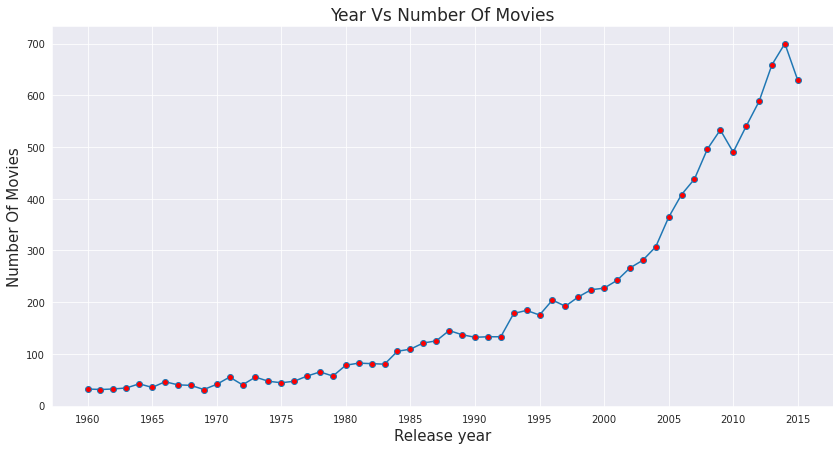

In [32]:
fig, ax = plt.subplots(figsize=(14,7))
moviesNo.plot(xticks = np.arange(1960,2016,5),marker='o',markerfacecolor='r')

plt.title("Year Vs Number Of Movies",fontsize = 17)
plt.xlabel('Release year',fontsize = 15)
plt.ylabel('Number Of Movies',fontsize = 15)
sns.set_style("darkgrid")


Note that year 2014 year has the highest release of movies 
followed by year 2013  and year 2015. 

2.The Movie with The Highest Or Lowest Profit

In [19]:
#Profit =Revenue - Budget
movies['profit'] = movies['revenue'] - movies['budget']
movies[['profit','revenue','budget']].head() 

,profit,revenue,budget
0,1363528810,1513528810,150000000
1,228436354,378436354,150000000
2,185238201,295238201,110000000
3,1868178225,2068178225,200000000
4,1316249360,1506249360,190000000


In [20]:
def MaxMin (x,y):
  max = movies[x][movies[y].idxmax()]
  min = movies[x][movies[y].idxmin()]
  MaxMin_data = movies.loc[movies[x].isin([max,min])].T
  print("Movie Which Has Highest " + y+ ": " + max)
  print("Movie Which Has lowest " + y+ ": " + min)
  return  MaxMin_data

In [21]:
MaxMin('original_title','profit')

Movie Which Has Highest profit: Avatar
Movie Which Has lowest profit: The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


In [22]:
top10_profit =movies.groupby('profit').count()['id']
top10_profit.sort_values().head(10)


profit
-413912431    1
 36797583     1
 36721196     1
 36699403     1
 36643346     1
 36611610     1
 36502684     1
 36500000     1
 36489888     1
 36486080     1
Name: id, dtype: int64

In [23]:
MaxMin('original_title','vote_average')

Movie Which Has Highest vote_average: The Story of Film: An Odyssey
Movie Which Has lowest vote_average: Transmorphers


,3894,7772
id,125336,25055
popularity,0.006925,0.12112
budget,0,0
revenue,0,0
original_title,The Story of Film: An Odyssey,Transmorphers
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...
director,Mark Cousins,Leigh Scott
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,futuristic
runtime,900,86
genres,Documentary,Action|Adventure|Science Fiction


In [30]:
def top10(x,y)   :
   
    data =movies.sort_values(by=[y],ascending = False)
    xx = data[x][:10]
    yy = data[y][:10]
    fig, ax = plt.subplots(figsize=(10,5))
    plt.plot(yy, xx, color='r', marker='o',markerfacecolor='g', linestyle='dashed')
    plt.gca().invert_yaxis()
    plt.title("Top 10 High "+y.title()+ " Movies",fontsize = 17)
    plt.xlabel(y.title() ,fontsize = 15)
    plt.ylabel('Movies',fontsize = 15)
    sns.set_style("darkgrid")
    



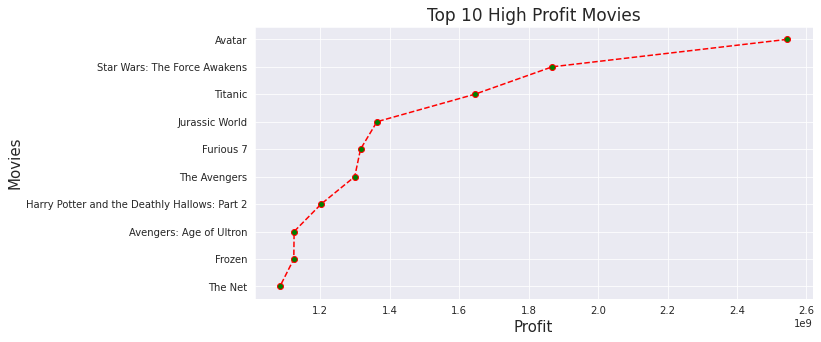

In [34]:
top10('original_title','profit')

3.Movie with Highest And Lowest Budget

In [36]:
movies['budget'] =movies['budget'].replace(0,np.NAN)
MaxMin('original_title','budget')

Movie Which Has Highest budget: The Warrior's Way
Movie Which Has lowest budget: Fear Clinic


,1151,2244
id,287524,46528
popularity,0.177102,0.25054
budget,1,4.25e+08
revenue,0,11087569
original_title,Fear Clinic,The Warrior's Way
cast,Thomas Dekker|Robert Englund|Cleopatra Coleman...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Robert Hall,Sngmoo Lee
keywords,phobia|doctor|fear,assassin|small town|revenge|deception|super speed
runtime,95,100
genres,Horror,Adventure|Fantasy|Action|Western|Thriller


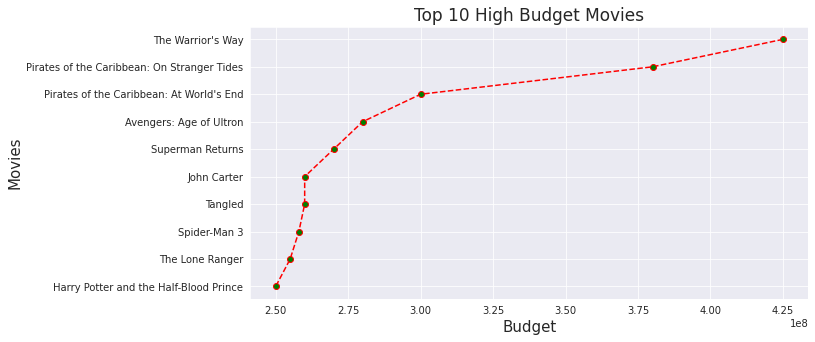

In [35]:
top10('original_title','budget')

4.Movie with Largest And Lowest Earned Revenue

In [ ]:
MaxMin('original_title','revenue')

Movie Which Has Highest revenue: Avatar
Movie Which Has lowest revenue: Wild Card


,48,1386
id,265208,19995
popularity,2.93234,9.43277
budget,3e+07,2.37e+08
revenue,0,2781505847
original_title,Wild Card,Avatar
cast,Jason Statham|Michael Angarano|Milo Ventimigli...,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,Simon West,James Cameron
keywords,gambling|bodyguard|remake,culture clash|future|space war|space colony|so...
runtime,92,162
genres,Thriller|Crime|Drama,Action|Adventure|Fantasy|Science Fiction


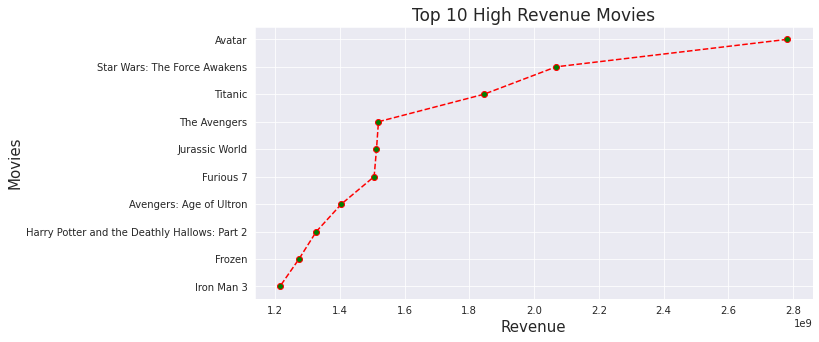

In [37]:
top10('original_title','revenue')

5. Movie with Longest And Shortest Rintime

In [38]:
movies['runtime'] =movies['runtime'].replace(0,np.NAN)
MaxMin('original_title','runtime')

Movie Which Has Highest runtime: The Story of Film: An Odyssey
Movie Which Has lowest runtime: Fresh Guacamole


,3894,4883
id,125336,142563
popularity,0.006925,0.078472
budget,NaN,NaN
revenue,0,0
original_title,The Story of Film: An Odyssey,Fresh Guacamole
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,NaN
director,Mark Cousins,PES
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,NaN
runtime,900,2
genres,Documentary,Animation


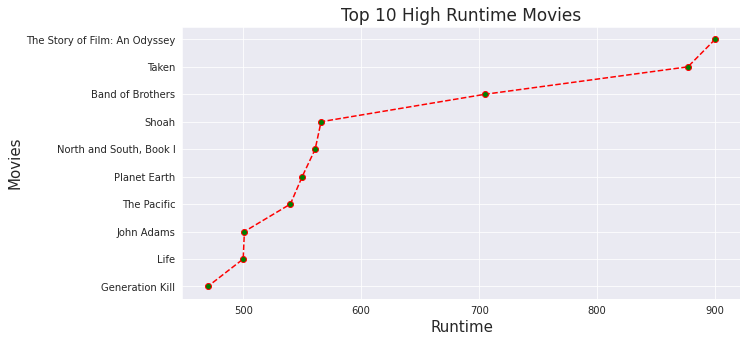

In [39]:
top10('original_title','runtime')

6.Movie with Highest And Lowest Votes

In [40]:
MaxMin('original_title','vote_average')


Movie Which Has Highest vote_average: The Story of Film: An Odyssey
Movie Which Has lowest vote_average: Transmorphers


,3894,7772
id,125336,25055
popularity,0.006925,0.12112
budget,NaN,NaN
revenue,0,0
original_title,The Story of Film: An Odyssey,Transmorphers
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...
director,Mark Cousins,Leigh Scott
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,futuristic
runtime,900,86
genres,Documentary,Action|Adventure|Science Fiction


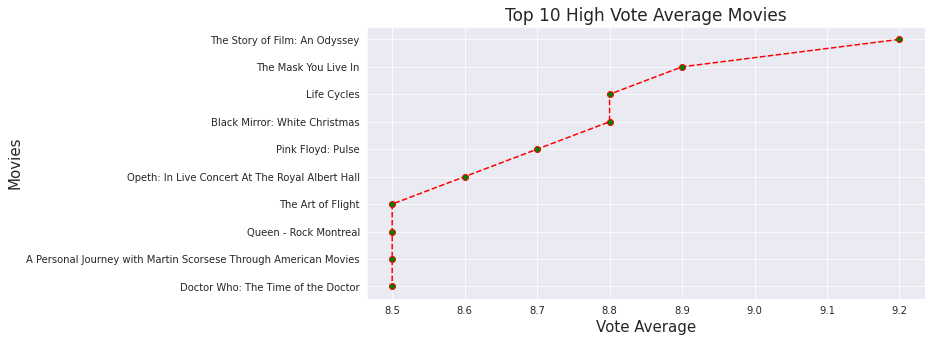

In [41]:

movies=movies.rename(columns={'vote_average': 'Vote Average'})
top10('original_title','Vote Average')

7.THE Year WITH The Highest Profit Rate

Text(0, 0.5, 'Profit')

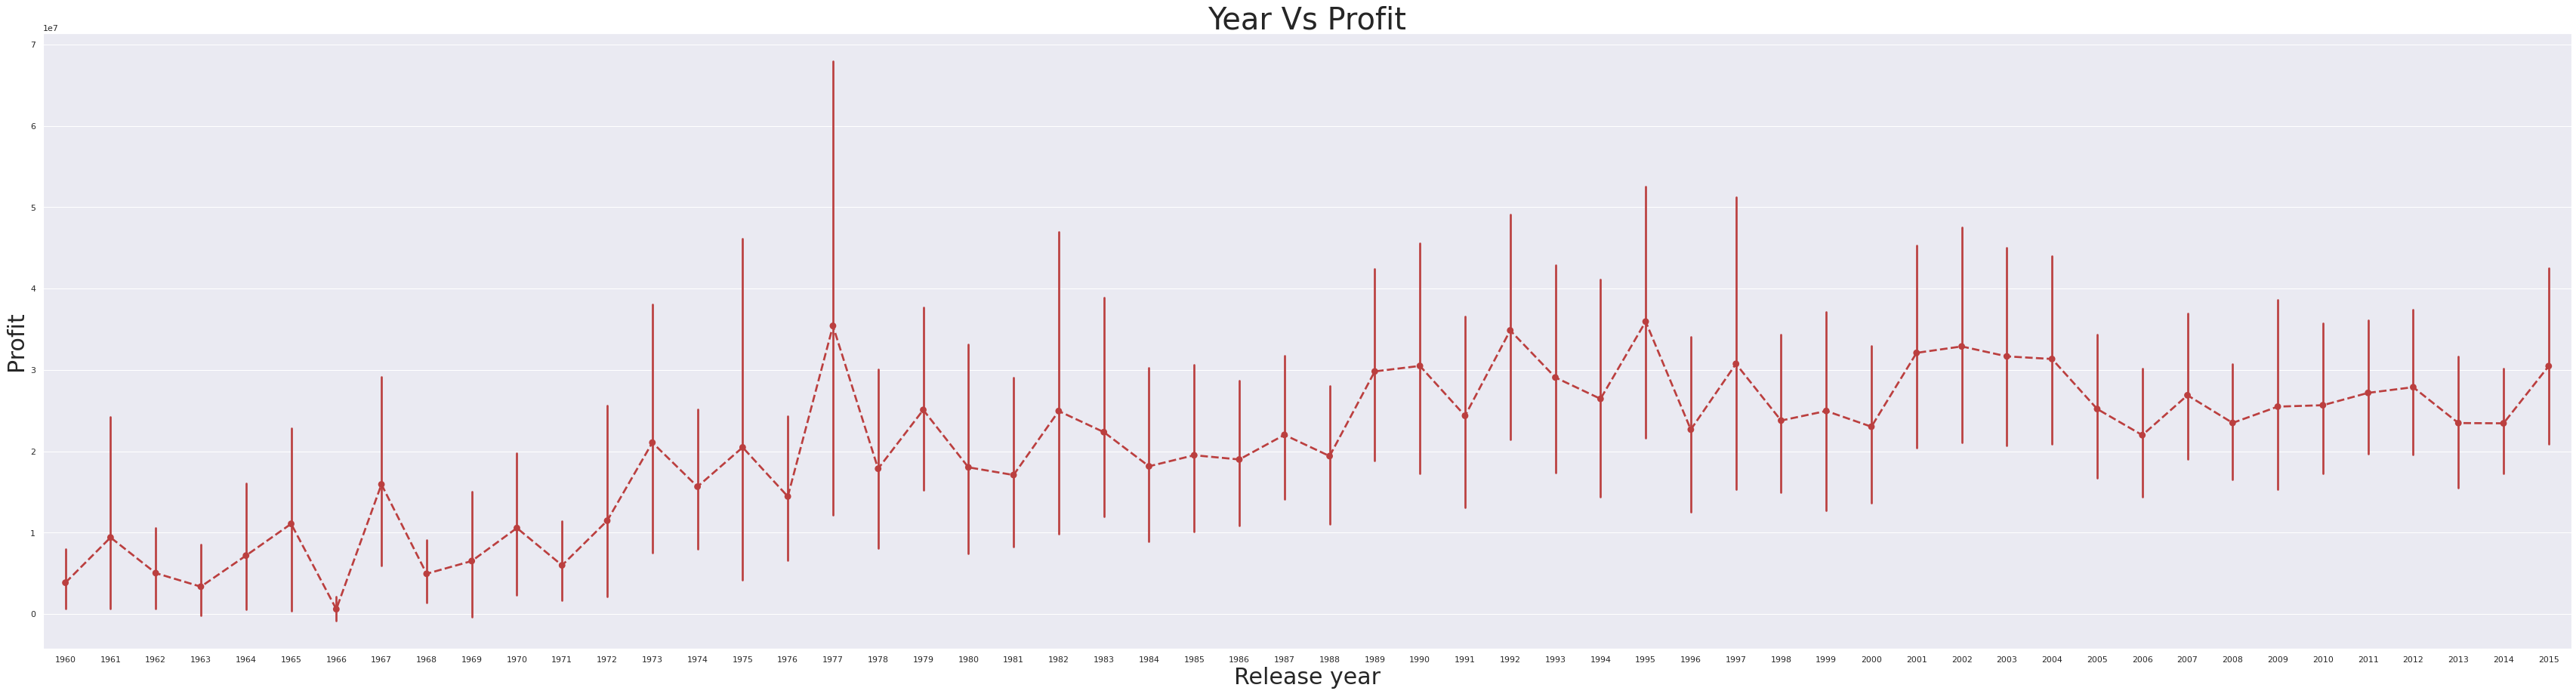

In [43]:
sns.pointplot(x=movies['release_year'],y=movies['profit'],linestyles='--', color="#bb3f3f")
sns.set(rc={'figure.figsize':(60,15)})
plt.title("Year Vs Profit",fontsize = 40)
plt.xlabel('Release year',fontsize = 30)
plt.ylabel('Profit',fontsize = 30)

Text(0, 0.5, 'Average Profit')

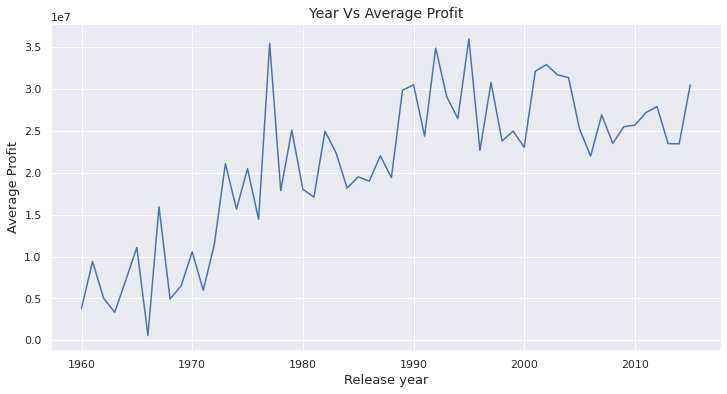

In [47]:
plt.subplots(figsize=(12,6))
movies.groupby('release_year')['profit'].mean().plot()

plt.title("Year Vs Average Profit",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Average Profit',fontsize = 13)

8.Most length movies liked by the audiences according to their popularity

The Most Popular Runtime is :  124.0


Text(0, 0.5, 'Average Popularity')

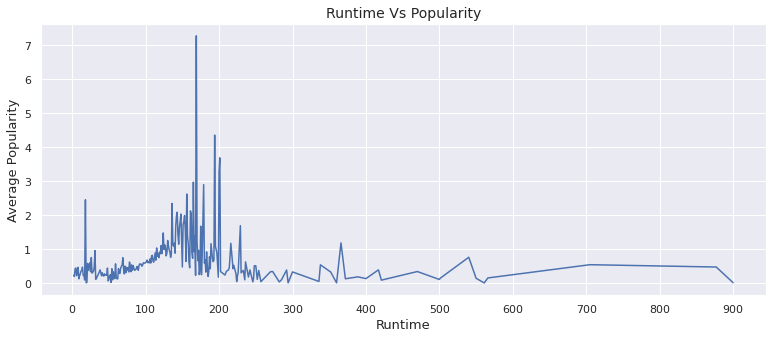

In [48]:
l=list(movies['runtime'][movies['popularity']==max(movies['popularity'])])
print ( "The Most Popular Runtime is : ", l[0])
movies.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))
plt.title("Runtime Vs Popularity",fontsize = 14)
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)

9.Average Runtime Of Movies From Year To Year

Text(0, 0.5, 'Runtime')

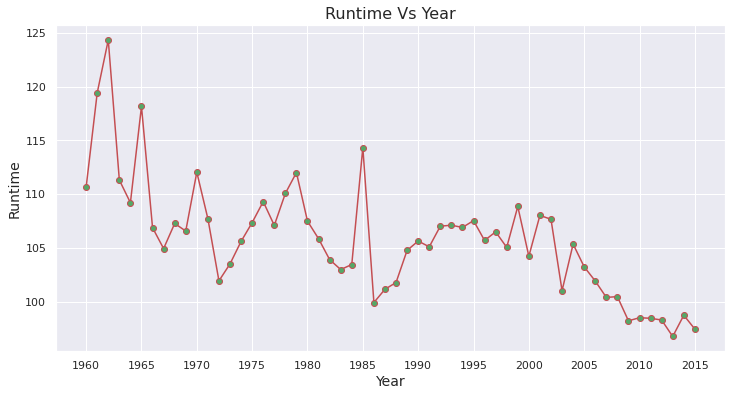

In [49]:
plt.figure(figsize=(12,6))
movies.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5),marker='o', markerfacecolor='g',color='r')
plt.title("Runtime Vs Year",fontsize = 16)
#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 14)
plt.ylabel('Runtime',fontsize = 14)


10. How Does The Revenue And Popularity differs Budget And Runtime? And How Does Popularity Depends On Profit?

In [50]:

def plot_corr(a,b) :
      ax = sns.regplot(x=a, y=b,data=movies)
      sns.set(rc={'figure.figsize':(10,7)})
      ax.set_title(a.title() +" Vs "+b.title(),fontsize=13)
      ax.set_xlabel(a.title(),fontsize=12)
      ax.set_ylabel(b.title(),fontsize=12)
      sns.set_style("whitegrid")

    
def corr(a,b):
            movies[a] = movies[a].replace(0,np.NAN)
            movies[b] = movies[b].replace(0,np.NAN)
            data_corr =movies.corr()
            print("Correlation Between "+ a + "And"+ b+ " : ",data_corr.loc[a,b])

Correlation Between revenueAndbudget :  0.6885476775894072


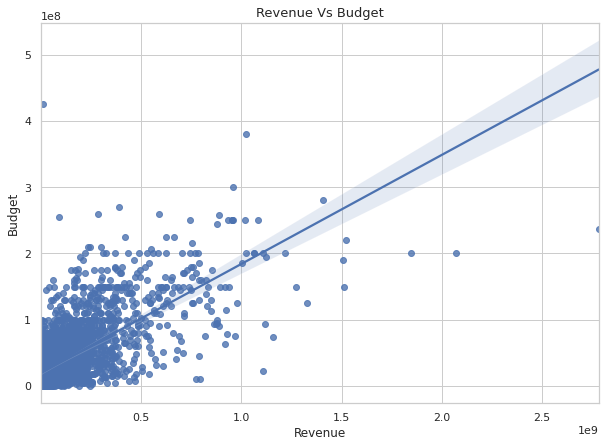

In [52]:
corr('revenue','budget')
plot_corr('revenue','budget')

Correlation Between profitAndbudget :  0.5383656402603096


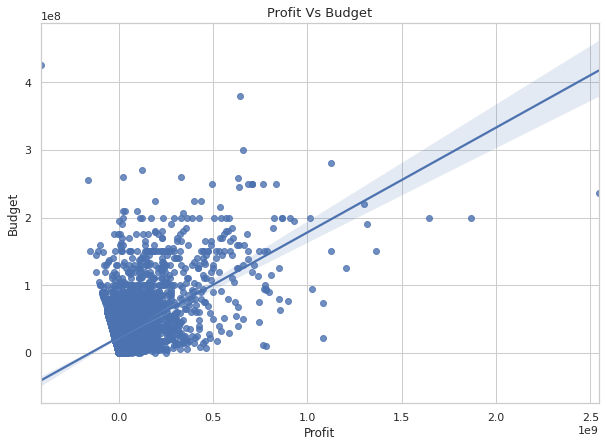

In [53]:
corr('profit','budget')
plot_corr('profit','budget')

Correlation Between release_yearAndVote Average :  -0.11763221187978037


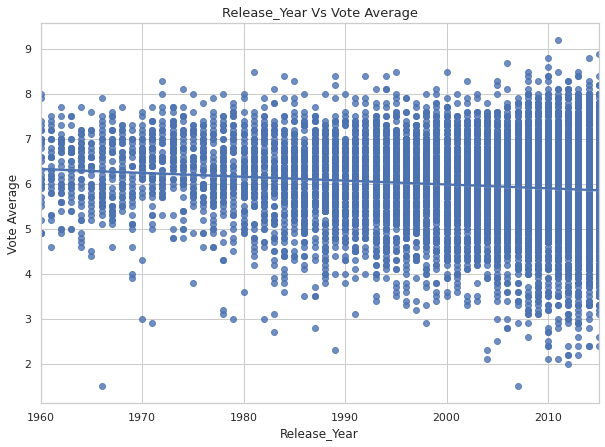

In [54]:
corr('release_year','Vote Average')
plot_corr('release_year','Vote Average')

Correlation Between popularityAndprofit :  0.6159198731132083


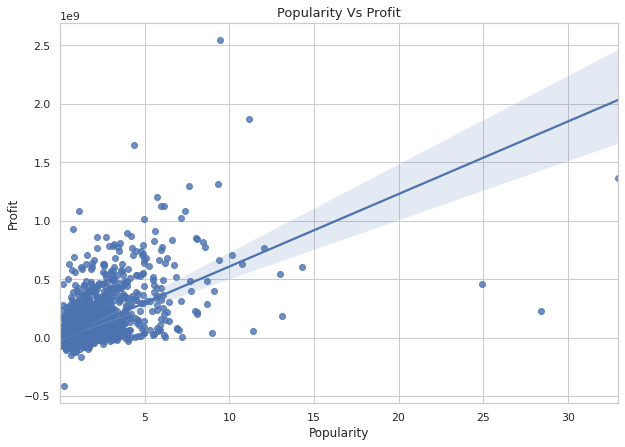

In [55]:
corr('popularity','profit')
plot_corr('popularity','profit')

11.Which Month Released Highest Number Of Movies In All Of The Years? And Which Month Made The Highest Average Revenue?

In [56]:
month_release =movies['release_date'].dt.month
number_of_release = month_release.value_counts().sort_index()

months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)
number_of_release

,number_of_release,month
1,919,Jan
2,691,Feb
3,823,Mar
4,797,Apr
5,809,May
6,827,Jun
7,799,Jul
8,918,Aug
9,1331,Sep
10,1153,Oct


Text(0, 0.5, 'Number of movie releases')

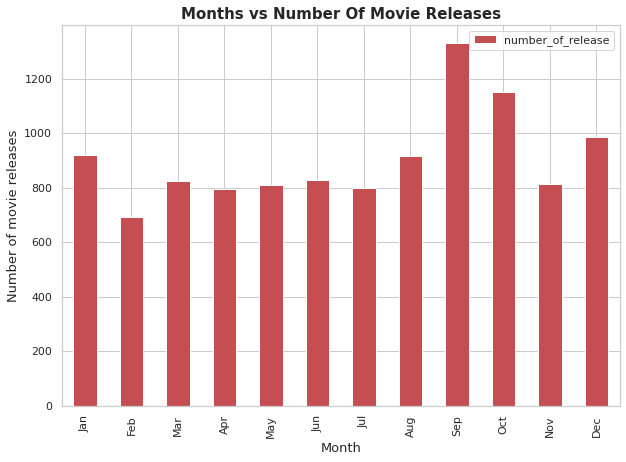

In [57]:
number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(10,7),color='r')
plt.title('Months vs Number Of Movie Releases',fontsize = 15,fontweight='bold')
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)


In [58]:
month_release = pd.DataFrame(month_release)
month_release.rename(columns = {'release_date':'release_month'},inplace=True)
month_release['revenue'] = movies['revenue']
mean_revenue  = month_release.groupby('release_month').mean()
mean_revenue['month'] = months
mean_revenue

,revenue,month
release_month,,
1,4.294198e+07,Jan
2,6.128107e+07,Feb
3,8.439762e+07,Mar
4,7.650220e+07,Apr
5,1.363645e+08,May
6,1.503917e+08,Jun
7,1.181829e+08,Jul
8,5.911315e+07,Aug
9,4.225202e+07,Sep


Text(0, 0.5, 'Average Revenue')

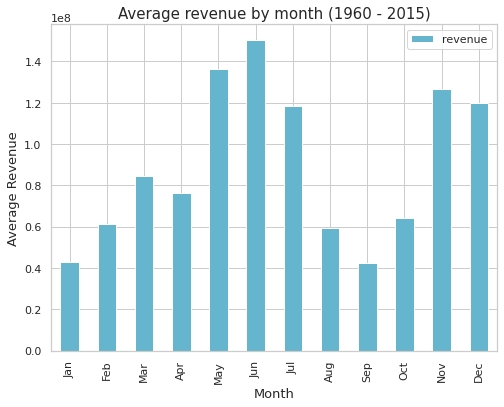

In [59]:
mean_revenue.plot(x='month',kind='bar',figsize = (8,6),fontsize=11,color='c')
plt.title('Average revenue by month (1960 - 2015)',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Average Revenue',fontsize = 13)

12.Which Genre Has The Highest Release Of Movies?

In [60]:
def count_genre(x):

    data_plot =movies[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

total_genre_movies = count_genre('genres')
total_genre_movies

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

Text(0, 0.5, 'Genres')

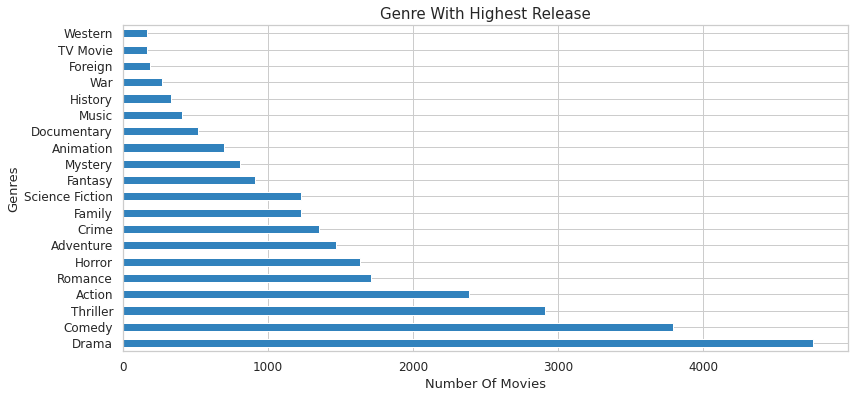

In [61]:
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)

In [62]:
i = 0
genre_count = []
for genre in total_genre_movies.index:
    genre_count.append([genre, total_genre_movies[i]])
    i = i+1
genre_count   

[['Drama', 4761],
 ['Comedy', 3793],
 ['Thriller', 2908],
 ['Action', 2385],
 ['Romance', 1712],
 ['Horror', 1637],
 ['Adventure', 1471],
 ['Crime', 1355],
 ['Family', 1231],
 ['Science Fiction', 1230],
 ['Fantasy', 916],
 ['Mystery', 810],
 ['Animation', 699],
 ['Documentary', 520],
 ['Music', 408],
 ['History', 334],
 ['War', 270],
 ['Foreign', 188],
 ['TV Movie', 167],
 ['Western', 165]]

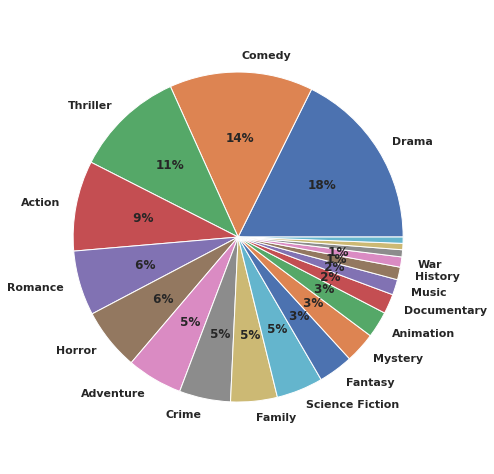

In [63]:
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(7, 7))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()

In [64]:
text = " ".join(review for review in labels)

In [65]:
from wordcloud import WordCloud, STOPWORDS
word_cloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=100,relative_scaling=0.7,
                      normalize_plurals=False).generate(text)



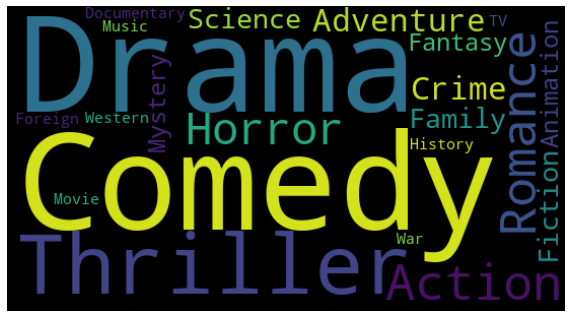

In [68]:
plt.figure()
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

13.Which genres are most popular from year to year?

In [69]:
genre_details = list(map(str,(movies['genres'])))
genre = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family','nan', 'Animation','War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']
 
year = np.array(movies['release_year'])
popularity = np.array(movies['popularity'])

popularity_df = pd.DataFrame(index = genre, columns = range(1960, 2016))

popularity_df = popularity_df.fillna(value = 0.0)

z = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    popularity_df.loc[split_genre, year[z]] =  popularity_df.loc[split_genre, year[z]] + popularity[z]
    z+=1    
popularity_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,3.504904,4.603938,6.597594,5.099410,3.682157,3.490923,3.229519,7.178829,5.545733,3.744663,4.214834,3.234661,2.325218,3.654709,3.724634,7.042379,3.093156,21.107186,4.923651,7.892720,11.040571,12.261412,9.799381,12.608338,15.023445,25.512385,13.581897,13.091013,6.966271,21.852098,18.440654,15.306117,15.909054,18.682346,18.177983,23.189834,27.101808,32.444745,33.197161,20.246122,23.928610,44.264044,49.566045,52.945663,53.932198,55.136227,51.830019,51.230969,63.528230,81.966362,80.258813,70.028286,73.073879,84.475720,162.845275,226.581261
Science Fiction,0.983714,1.096410,0.358424,0.935671,0.906544,0.203911,1.906741,0.749862,5.374567,0.517620,1.276372,7.307348,1.822939,3.386817,2.359739,4.705635,2.733389,15.200587,5.158255,12.597986,9.868573,4.969630,13.962632,10.909499,19.033244,15.126884,11.531670,14.211713,7.376809,15.466422,13.424913,11.294131,10.532149,9.140089,10.468464,16.091241,18.555452,33.066997,20.325896,28.364369,13.714199,17.188066,30.170095,31.410136,37.980907,24.186119,23.845715,25.209269,40.234346,70.260241,37.820094,54.259455,50.663266,75.875393,142.255997,193.121886
Fantasy,0.856495,0.308146,0.235542,0.428142,2.399162,0.000000,0.849542,0.561027,2.227921,0.408196,0.937610,3.061445,0.432033,0.383880,1.279553,3.454561,0.355426,5.273857,2.290577,0.000000,2.884223,0.913120,9.588557,3.102565,12.217017,9.010729,6.333112,8.679080,8.797141,9.757900,9.052268,14.227867,13.271344,11.941812,15.531031,15.049177,15.367805,15.953282,15.201524,21.011601,15.907281,39.131503,28.609303,47.183139,25.090796,39.120605,34.786562,44.995426,37.681697,50.608117,46.964090,46.534893,46.166250,39.743062,65.856645,57.427532
Crime,0.692959,1.613038,1.418448,2.209470,2.616900,0.774553,1.703508,3.768515,2.779596,2.844060,1.199209,4.563638,7.509376,7.861367,9.086782,1.358177,5.657989,0.815694,3.590125,2.987237,3.748840,2.475969,4.056550,7.149778,8.935232,5.949529,8.707419,10.940075,12.356589,10.270862,15.445359,11.101245,20.294525,17.674543,33.745080,26.489986,18.559925,22.064079,22.749771,21.262334,20.782252,25.188925,27.743219,34.686224,25.587874,35.561382,35.458092,44.358441,47.708682,28.100370,35.293322,42.801786,46.632713,65.017269,57.459754,87.823617
Western,3.406554,0.630062,1.242541,0.493914,0.127679,0.767331,1.712597,0.379480,0.621202,3.564572,1.924176,1.659861,1.579827,1.784999,0.768440,0.536660,1.243236,0.241629,0.063184,1.028788,1.500546,0.000000,0.498908,0.290596,0.000000,0.803895,0.731945,0.318343,0.000000,0.123132,2.391516,0.734609,1.151556,1.845084,4.780288,1.772451,0.000000,0.000000,1.057585,0.877415,0.854747,0.612218,1.040588,2.280979,4.539993,1.795307,0.463068,2.559719,0.731827,0.000000,4.347770,3.527401,6.931111,1.995766,4.043682,19.072777


In [70]:
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,0.753047,1.338265,1.996432,1.398764,0.550490,1.124313,0.951448,1.817532,1.534066,1.097634,1.496503,0.072402,0.125947,0.062728,0.279731,1.565013,0.132939,2.593166,0.522842,0.703503,1.347299,1.929985,0.683977,1.152118,0.825473,1.874071,0.741357,0.555195,-0.159030,1.166628,0.898690,0.636783,0.520196,0.404163,0.108033,0.394631,0.652247,0.735895,0.910220,0.131342,0.529956,1.054008,1.024467,1.049863,0.933685,0.872105,0.608896,0.520337,0.755137,0.977663,1.027009,0.586530,0.732253,0.755530,1.174435,1.614759
Science Fiction,-0.467064,-0.361952,-0.640003,-0.646572,-0.667888,-0.869288,0.097082,-0.634089,1.452081,-0.710447,-0.404293,1.352652,-0.059817,-0.006964,-0.133475,0.721808,0.020561,1.638662,0.598181,1.669079,1.099753,0.216018,1.443877,0.873734,1.324551,0.747050,0.471247,0.690609,-0.112773,0.534115,0.377828,0.191041,-0.007180,-0.304584,-0.337527,-0.032944,0.149970,0.769710,0.136909,0.571719,-0.130782,-0.286618,0.195751,0.191920,0.331894,-0.210817,-0.285369,-0.305635,0.082456,0.679288,-0.091894,0.212188,0.189865,0.575138,0.902119,1.231957
Fantasy,-0.528631,-0.744050,-0.691929,-0.895883,-0.012691,-0.992961,-0.585750,-0.706100,-0.055098,-0.771756,-0.623427,0.017952,-0.574233,-0.788173,-0.460488,0.270363,-0.722223,0.034506,-0.322721,-0.916176,-0.375463,-0.737483,0.645496,-0.405570,0.476172,0.083332,-0.213644,0.022105,0.047264,-0.031325,-0.076252,0.516987,0.261485,-0.096487,-0.044943,-0.095711,-0.037370,-0.160309,-0.170965,0.172866,0.011082,0.799878,0.129064,0.820293,-0.154410,0.311730,0.064256,0.322410,0.008741,0.178378,0.149189,0.028812,0.081027,-0.182739,-0.108344,-0.320493
Crime,-0.607773,-0.111525,-0.192078,-0.020849,0.082887,-0.523188,-0.034184,0.517043,0.209143,0.593035,-0.454207,0.490166,2.043269,1.157083,1.903057,-0.486108,0.934094,-0.685931,0.094605,-0.303159,-0.192841,-0.370128,-0.364238,0.257637,0.067706,-0.248865,0.099162,0.295299,0.448326,0.019485,0.587642,0.169611,0.950330,0.329309,1.007710,0.593411,0.150233,0.171773,0.282537,0.186467,0.326429,0.109533,0.092059,0.322434,-0.135657,0.187195,0.085715,0.302191,0.298300,-0.395319,-0.158512,-0.059809,0.092316,0.347388,-0.219402,0.027262
Western,0.705451,-0.588007,-0.266409,-0.863575,-1.009777,-0.527569,-0.028313,-0.775331,-0.824684,0.996730,0.014751,-0.422636,-0.149730,-0.423674,-0.615222,-0.782549,-0.444905,-0.778700,-1.038008,-0.705056,-0.667720,-0.952116,-1.013599,-0.866360,-1.044414,-0.807263,-0.951578,-0.988116,-0.943958,-0.985667,-0.767941,-0.982148,-0.927245,-0.846417,-0.666266,-0.895418,-0.940549,-1.027265,-1.020738,-0.919320,-0.962619,-1.107345,-1.048844,-0.968543,-0.929727,-0.994256,-1.032584,-1.024569,-1.058297,-1.111565,-0.974396,-0.992158,-0.868553,-0.974491,-0.925887,-0.759302


In [71]:
popular_genre.tail()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
History,0.054678,-0.407043,0.222791,-0.159866,-0.649195,-0.570959,-0.700875,-0.920042,-0.429774,0.208056,-0.621334,-0.770619,-0.734017,-0.614720,-0.714222,-0.658292,-0.425218,-0.470986,-0.777294,-0.536032,-0.621237,-0.357575,-0.889180,-0.803245,-0.611710,-0.894494,-0.917589,-0.730921,-0.871708,-0.871043,-0.961023,-0.990563,-0.831253,-0.537657,-0.838501,-0.719622,-0.806097,-0.885322,-0.693136,-0.837151,-0.849641,-0.800911,-0.864439,-0.856846,-0.900570,-0.784447,-0.803076,-0.880289,-0.766697,-0.903615,-0.894529,-1.017180,-0.900662,-0.784726,-0.765837,-0.804541
Music,-0.738161,-0.345914,-0.654578,-1.106198,0.588609,0.182270,-1.134459,-0.631100,-0.381507,-0.547469,-0.657219,-0.852914,-0.388505,-0.745163,-0.751908,-0.232646,-0.683653,-0.559479,-0.403377,-0.528639,-0.550948,-0.843458,-0.597084,-0.670936,-0.378674,-0.835232,-0.758005,-0.714618,-0.716992,-0.911608,-0.918949,-0.379098,-0.804474,-0.829334,-0.867100,-1.002179,-0.860596,-0.930000,-0.729239,-0.820723,-0.717154,-0.946010,-1.045582,-0.839519,-0.875449,-0.892184,-0.772169,-0.766035,-0.840576,-0.891951,-0.988672,-0.915219,-0.807498,-0.789625,-0.737873,-0.737730
Horror,1.060468,-0.523212,-0.412490,0.560094,-0.566332,-0.614385,-0.951550,-0.477742,-0.052371,-0.921448,-0.346495,-0.559902,-0.178969,0.749115,-0.108676,0.958588,0.382038,-0.398337,1.316468,0.734638,0.525904,0.794783,0.550030,-0.069113,0.047114,-0.097534,0.673334,0.373702,0.451947,-0.077927,0.320460,-0.527088,-0.074002,-0.527412,-0.546527,-0.443349,-0.432964,-0.266600,-0.281259,-0.121820,-0.472004,-0.523608,-0.315377,-0.599829,-0.259100,-0.085215,-0.329266,0.407151,-0.372430,-0.097716,-0.225483,-0.109921,0.056889,0.036064,-0.307361,-0.295824
Documentary,-0.943125,-0.893419,-0.791460,-1.106198,-1.065823,-0.992961,-1.082401,-0.883776,-1.122227,-1.000464,-0.815321,-0.944414,-0.635947,-0.882331,-0.786695,-0.930777,-0.793843,-0.733598,-0.918431,-0.916176,-0.984661,-0.924168,-1.027928,-0.913979,-0.993534,-0.878495,-1.048009,-1.026581,-0.841578,-0.952650,-1.001456,-0.983934,-0.989026,-0.974632,-0.911914,-0.989649,-0.914012,-0.993848,-1.058811,-0.929473,-0.992528,-1.096964,-0.996863,-0.971561,-1.022814,-0.950486,-0.941845,-0.970569,-0.951689,-0.978443,-0.881315,-0.856306,-0.852598,-0.799858,-0.833269,-0.853291
Foreign,-0.848782,-0.838328,-0.691929,-0.760722,-0.999010,-0.990068,-0.667409,-0.920042,-1.122227,-1.000464,-1.170327,-0.944414,-0.734017,-0.888038,-0.847858,-0.976201,-0.820015,-0.817747,-1.023551,-0.916176,-0.829546,-0.952116,-1.067515,-0.889696,-1.044414,-0.894501,-1.048009,-1.026581,-0.935175,-0.909204,-0.987663,-0.989198,-0.991134,-0.885261,-0.901913,-0.988998,-0.929528,-0.995943,-1.052459,-0.925683,-0.985042,-1.102540,-1.008784,-1.023973,-1.054709,-0.996490,-0.971584,-0.982823,-0.970257,-1.015502,-1.021264,-1.032695,-1.021840,-1.016352,-0.979369,-0.977510


Text(0, 0.5, 'Genres')

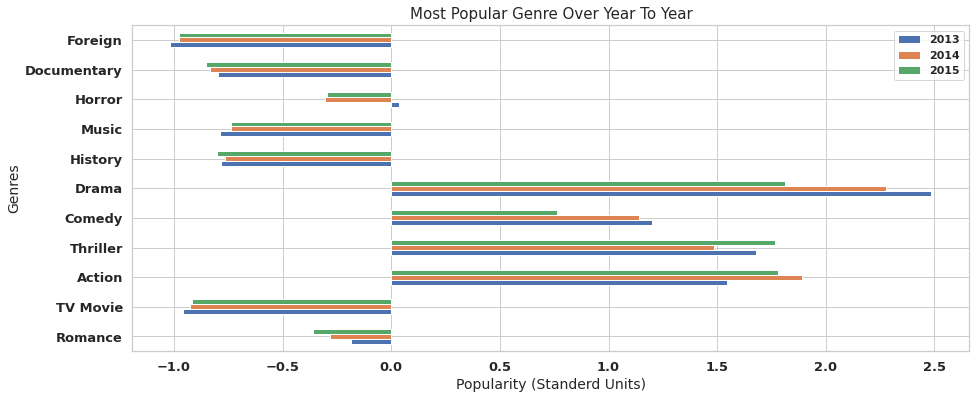

In [72]:
popular_genre.iloc[10:,53:].plot(kind='barh',figsize = (15,6),fontsize=13)

plt.title("Most Popular Genre Over Year To Year",fontsize=15)
plt.xlabel("Popularity (Standerd Units)",fontsize=14)
plt.ylabel("Genres",fontsize = 14)

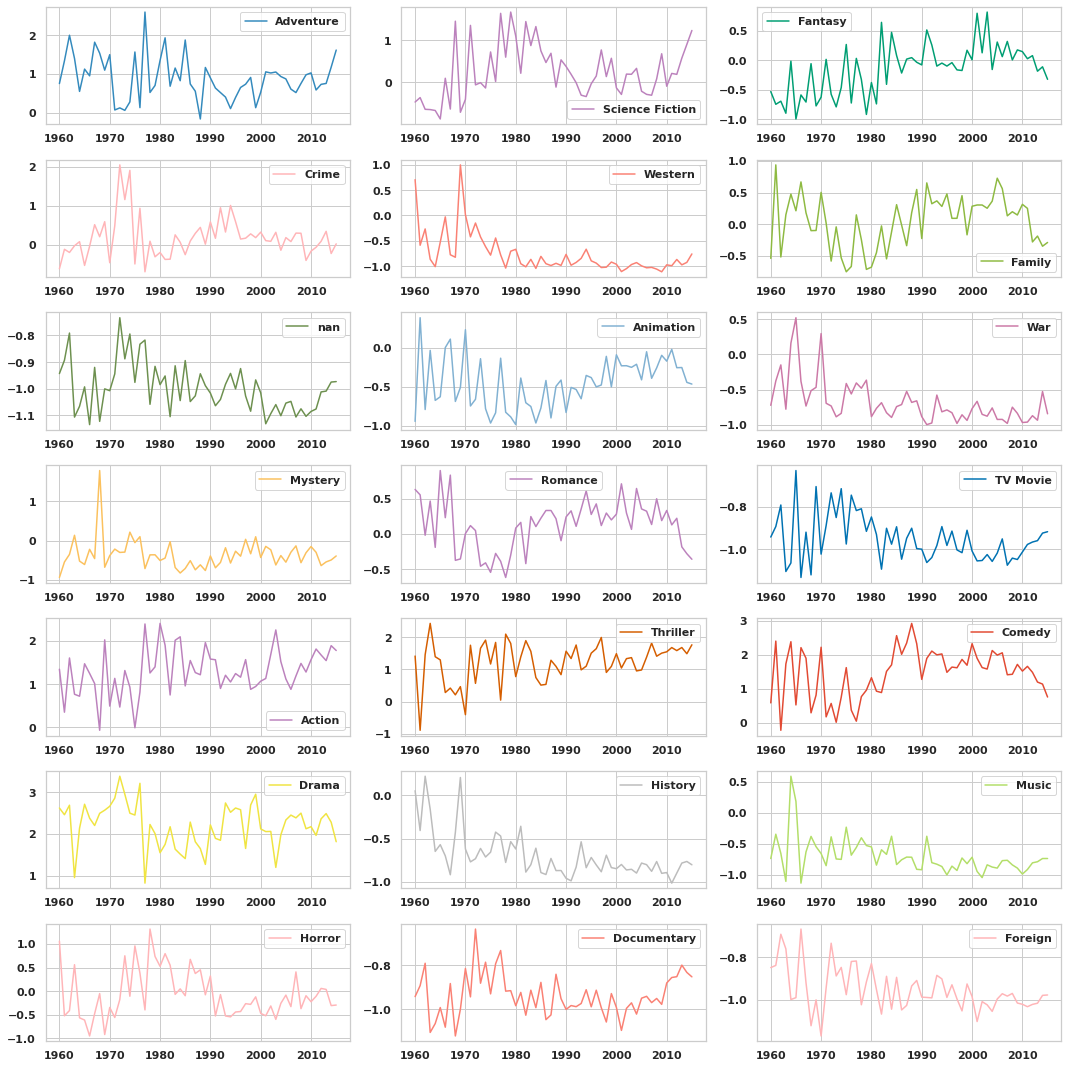

In [73]:
color = ['#348ABD','#bc82bd','#009E73','#FFB5B8','#fa8174','#8EBA42','#6d904f',
         '#81b1d2','#CC79A7','#FBC15E','#bc82bd','#0072B2','#bc82bd','#D55E00',
         '#E24A33','#F0E442','#bcbcbc','#b3de69','#FFB5B8','#fa8174','#FFB5B8','#fa8174']

fig, axes = plt.subplots(7,3,figsize = (15,15))
 
axe = [sub for x in axes for sub in x]

for i, (c, ax) in enumerate(zip(genre, axes.flatten())):
    
       popular_genre.loc[c].plot(ax = axe[i],legend=True,color =color[i])
       
fig.tight_layout()    

  

14.Most Frequent Actor?

In [74]:
count_actor_flims = count_genre('cast')


In [75]:
count_actor_flims[:10]

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
Morgan Freeman       49
John Goodman         49
Liam Neeson          48
dtype: int64

Text(0.5, 0, 'Actor')

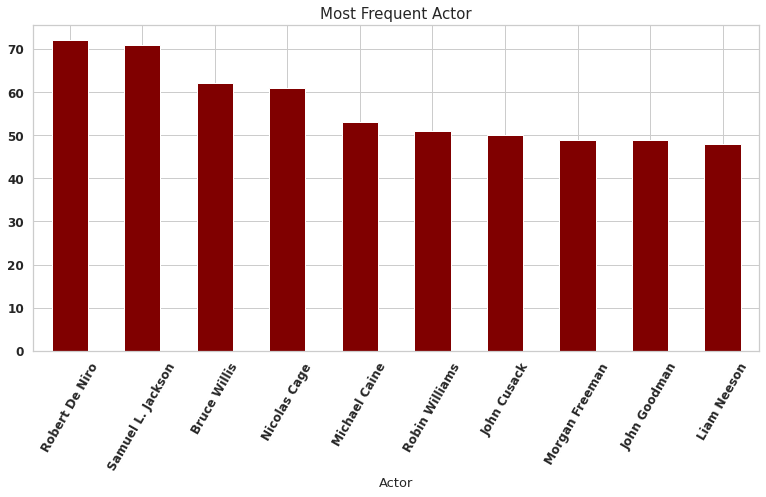

In [76]:
count_actor_flims.iloc[:10].plot.bar(figsize=(13,6),fontsize=12,color="maroon")

plt.title("Most Frequent Actor",fontsize=15)
plt.xticks(rotation = 60)
plt.xlabel('Actor',fontsize=13)

15.Top 20 Production Companies With Higher Number Of Release

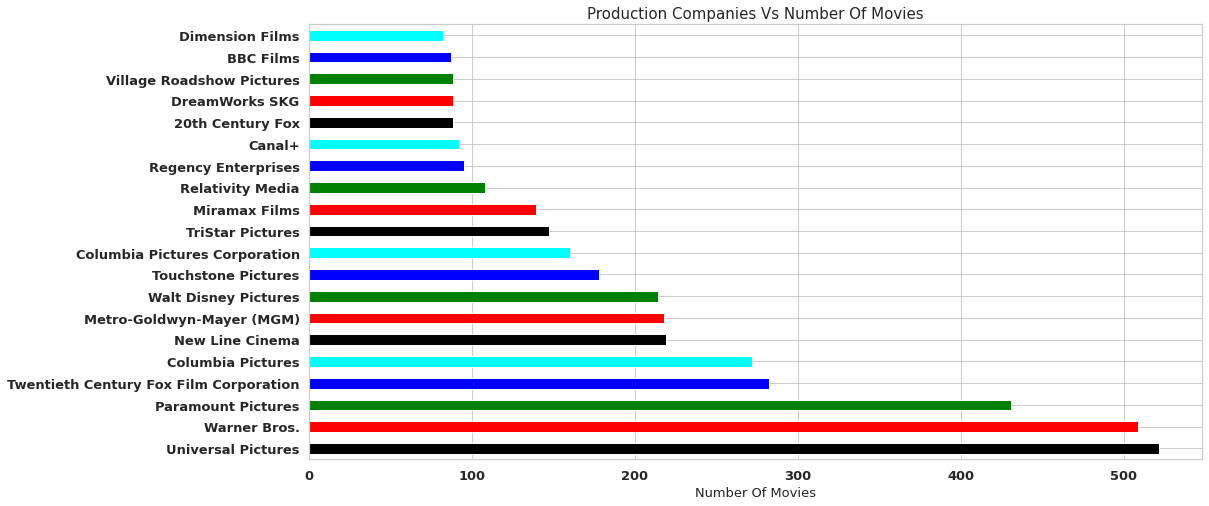

In [77]:
production_companies = count_genre('production_companies')
production_companies.iloc[:20].plot(kind='barh',figsize=(16,8),fontsize=13,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title("Production Companies Vs Number Of Movies",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
sns.set_style("whitegrid")

16.Life Time Profit Earn By Each Production Company

In [78]:
proCom = list(map(str,(movies['production_companies'])))
production_companies = pd.DataFrame(production_companies) 
proCom2= list(production_companies.index.values)
proCom2.append('nan')
movies['profit'] = movies['profit'].replace(np.NAN,0)
profit = np.array(movies['profit'])
companies_df = pd.DataFrame(index = proCom2,columns =np.arange(0,1,1) )
companies_df = companies_df.fillna(value = 0.0)

z = 0
for i in proCom:
    split_companies = list(map(str,i.split('|')))
    companies_df.loc[split_companies] = companies_df.loc[split_companies] + profit[z]
    z+=1

In [79]:
companies_df = companies_df.rename(columns={0:'Total Profit'})
companies_df.head()

,Total Profit
Universal Pictures,3.257542e+10
Warner Bros.,3.470382e+10
Paramount Pictures,2.753858e+10
Twentieth Century Fox Film Corporation,2.740275e+10
Columbia Pictures,1.825266e+10


Text(0.5, 0, 'Total Profit')

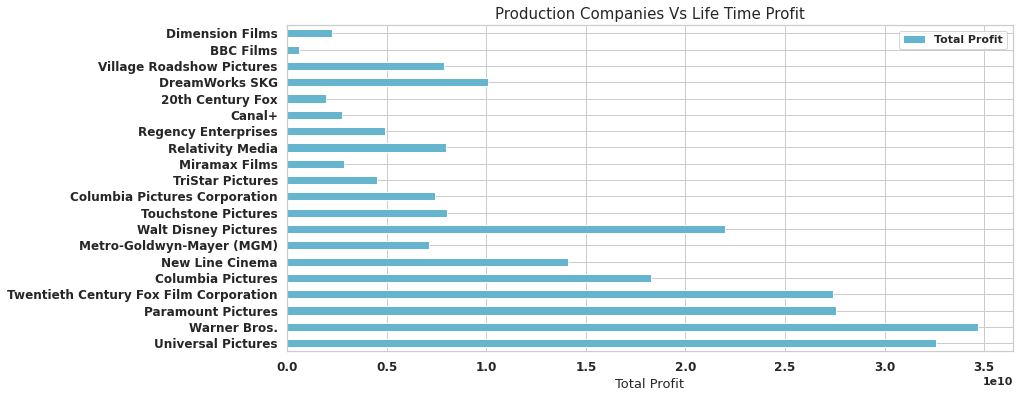

In [80]:
companies_df[:20].plot.barh(figsize=(13,6),fontsize=12,legend=True,color='c')
plt.title("Production Companies Vs Life Time Profit",fontsize=15)
plt.xlabel('Total Profit',fontsize=13)


17.Top 20 Director Who Directs Maximum Movies

Text(0, 0.5, 'Number Of Movie')

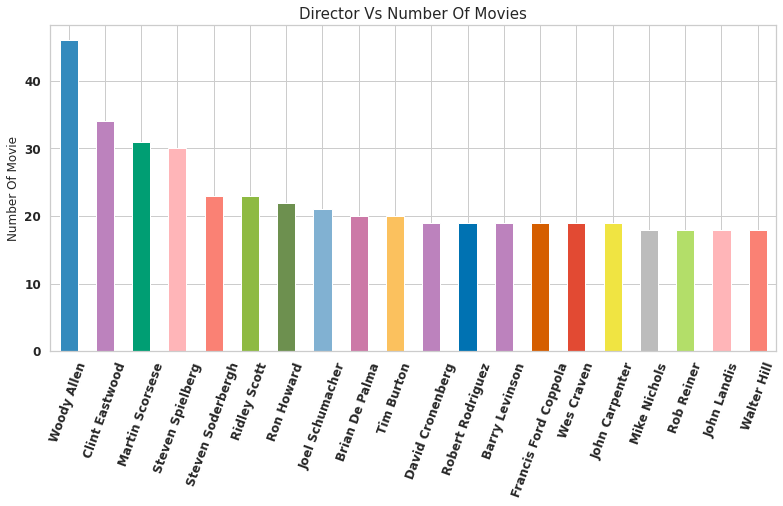

In [81]:

count_director_movies = count_genre('director')
count_director_movies.iloc[:20].plot(kind='bar',figsize=(13,6),fontsize=12,color=color)
plt.title("Director Vs Number Of Movies",fontsize=15)
plt.xticks(rotation=70)
plt.ylabel("Number Of Movie")

18.Most Popular Keyword

In [82]:
keywords = count_genre('keywords')
i = 0
keyword_occurences = []
for p in keywords.index:
    keyword_occurences.append([p, keywords[i]])
    i = i+1
    
keyword_occurences[:5]    




[['woman director', 413],
 ['independent film', 396],
 ['based on novel', 278],
 ['sex', 272],
 ['sport', 216]]

In [83]:
key_words, sizes = zip(*keyword_occurences)
key_words[:5]

('woman director', 'independent film', 'based on novel', 'sex', 'sport')

In [84]:
a=" ".join(key_words).split(" ")

In [85]:
text =' '.join(map(str, a))
word_cloud = WordCloud(width=1500,height=700, background_color='black', 
                      max_words=1000,relative_scaling=1,
                      normalize_plurals=False).generate(text)

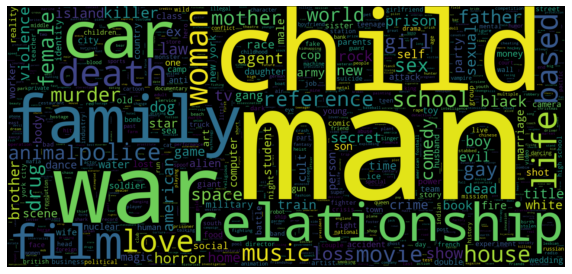

In [86]:
plt.figure()
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

19.What kinds of properties are associated with movies that have high revenues?

In [87]:
revenueData= pd.DataFrame(movies['revenue'].sort_values(ascending=False))
cols = ['popularity','budget','original_title','cast','director','runtime','genres','Vote Average','release_year']
for i in cols:
    revenueData[i] = movies[i]
revenueData.head()

,revenue,popularity,budget,original_title,cast,director,runtime,genres,Vote Average,release_year
1386,2.781506e+09,9.432768,237000000.0,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,7.1,2009
3,2.068178e+09,11.173104,200000000.0,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,7.5,2015
5231,1.845034e+09,4.355219,200000000.0,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194.0,Drama|Romance|Thriller,7.3,1997
4361,1.519558e+09,7.637767,220000000.0,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143.0,Science Fiction|Action|Adventure,7.3,2012
0,1.513529e+09,32.985763,150000000.0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,6.5,2015


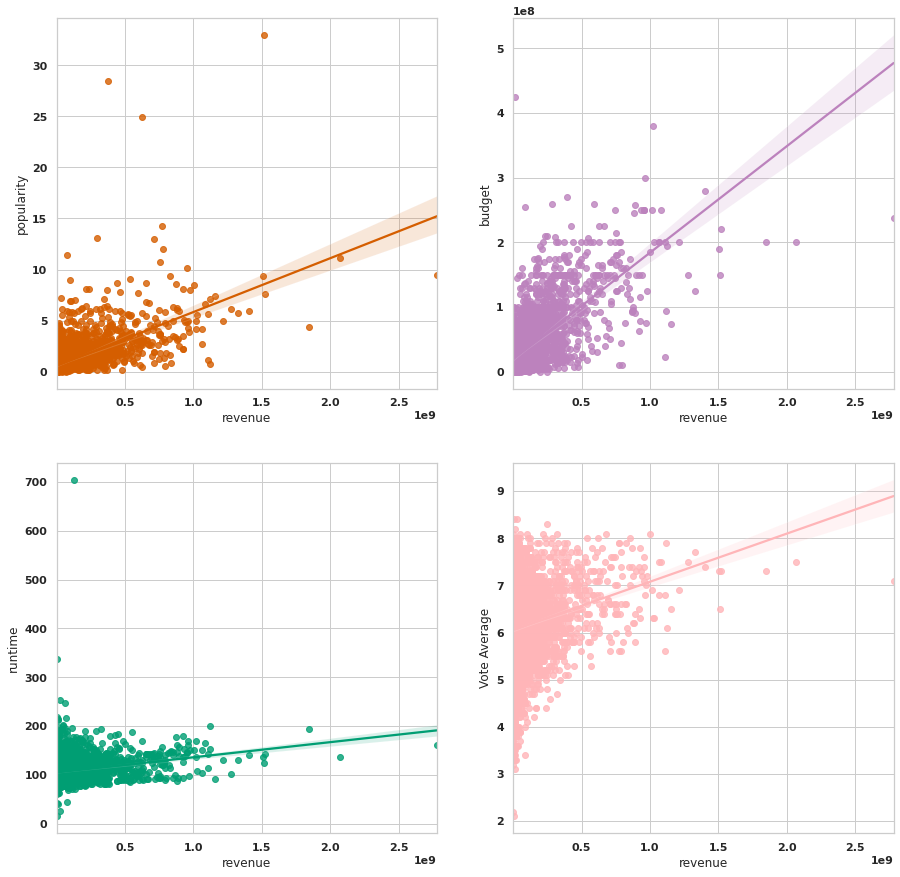

In [92]:
color = ['#D55E00','#bc82bd','#009E73','#FFB5B8']
fig, axes = plt.subplots(2,2,figsize = (15,15))
cols = ['popularity','budget','runtime','Vote Average']
axe = [sub for x in axes for sub in x]
for i, (c, ax) in enumerate(zip(cols, axes.flatten())):
     sns.regplot(x=movies['revenue'], y=movies[c],color=color[i],ax = axe[i])
       
       


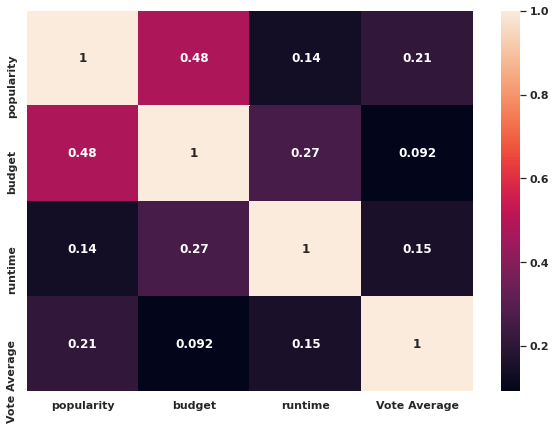

In [93]:
sns.heatmap(movies[cols].corr(),annot=True)